# Sorting Algos
- Sorting: Convert a gourp of unsorted series into a sorted series
- List Sorting: Convert a gourp of unsorted list into a sorted list
    - Input: list
    - Output: Sorted list
- Ascending and Descending
- Built-in function: `sort()`

### Common Sorting Algos
- Low efficiency: Bubble sort, Selection sort, Insertion sort
- High efficiency: Quick sort, Heap sort, Merge sort
- Others: Shel sort, Counting sort, Radix sort

## Bubble Sort
- Every adj num in a list, if the fomer one is greater than the latter one, swap the position
- Once a round of sorting finishes, chaos region reduces a num while ordered region increases a num
- Time Complexity: O(n^2)
![image.png](https://upload.wikimedia.org/wikipedia/commons/0/06/Bubble-sort.gif)

In [2]:
def bubble_sort(li):
    for i in range(len(li)-1):
        exchange = False
        for j in range(len(li)-i-1):
            if li[j] > li[j+1]:
                li[i],li[j+1] = li[j+1],li[i]
                exchange = True
            if not exchange:
                return

## Selection Sort
- Loop through the li, find and extract the largest number and then swap the position with the first num in chaos region and then form ordered region
- Keys: Ordered region, chaos region, the position of the min in the chaos region
- Time Complexity: O(n^2)
![image.png](https://upload.wikimedia.org/wikipedia/commons/0/0f/Insertion-sort-example-300px.gif)

In [3]:
def select_sort(li):
    for i in range(len(li)):
        min_loc = i # first element in chaos region
        for j in range(i+1,len(li)):
            if li[j] < li[min_loc]:
                min_loc = j
        li[i], li[min_loc] = li[min_loc], li[i]

## Insertion Sort
- Imaging playing card game
- Originally, there is only one card on hand (ordered region)
- Take a card from the chaos region and insert into the ordered region with correct position
- Time Complexity: O(n^2)
![image.png](https://upload.wikimedia.org/wikipedia/commons/9/9c/Insertion-sort-example.gif)

In [4]:
def insert_sort(li):
    for i in range(1,len(li)):
        tmp = li[i]
        j = i-1
        while li[j] > tmp and j >= 0:
            li[j+1] = li[j]
            j -= 1
        li[j+1] = tmp

## Quick Sort
- Main idea
    - Take an element p (usually the first element) from the li and put it in the correct position
    - The li is divided into two regions by p where the left parts are all less than p while the right parts are all greater than p
    - Apply recursion to finish sorting
- Problems with Quick Sort:
    - Worst case: the li is already in a descending order when sorting ascendingly and vise versa
    - Recursion
- Time Complexity: O(nlog(n))
![image-2.png](https://www.tutorialspoint.com/data_structures_algorithms/images/quick_sort_partition_animation.gif)

In [5]:
def partition(li,left,right):
    tmp = li[left]
    while left < right:
        while left < right and li[right] >= tmp: #Find the num which is less than tmp from the right
            right -= 1 #Go to the left for a step
        li[left] = li[right] #Swap the position of these two nums
        
        while left < right and li[left] <= tmp: #Find the num which is greater than tmp from the left
            left += 1 #Go to the right for a step
        li[right] = li[left] #Swap the position of these two nums
    li[left] = tmp #Put the tmp to the right position
    return left

def quick_sort(li,left,right):
    if left < right: # at least two nums exist
        mid = partition(li,left,right)
        quick_sort(li,left,mid-1)
        quick_sort(li,mid+1,right)
        

## Heap Sort
### Tree and Binary Tree
- Tree
    - Tree is a data structure
    - Tree can be defined recrusively
    - Tree comprises of n nodes:
        - if n=0, the tree is empty
        - if n>0, there exsists a node called "root", nother nodes can be divided into m subsets, each subset itself is a tree
- Binary Tree
    - We will see that dealing with binary trees, a tree where each node can have no more than two children is a good way to understand trees.
    - Nodes with the same parent are called siblings. In binary tree, the left node is "left child" and the right node is "right child"
    - A binary tree in which each node has exactly zero or two children is called a **full binary tree**. In a full tree, there are no nodes with exactly one child. 
    - **A complete binary tree** is a tree, which is completely filled, with the possible exception of the bottom level, which is filled from left to right. A complete binary tree of the height h has between 2^h and 2^(h+1)-1 nodes.
    - Relationship b/t parent and 
        - the left child: `i -> 2i+1` 
        - the right child: `i -> 2i+2`
        
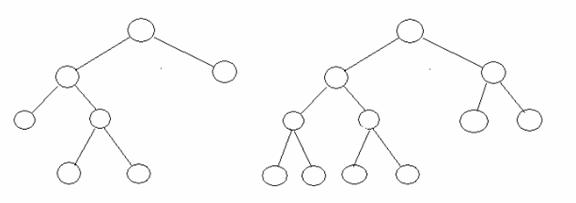
<center>Full binary tree (left) and complete binary tree (right)</center>

### Heap
- A special complete binary tree
    - Max-Heap: A complete binary tree which satisfies all the parent nodes are **greater** than their children nodes
    - Min-Heap: A complete binary tree which satisfies all the parent nodes are **less** than their children nodes
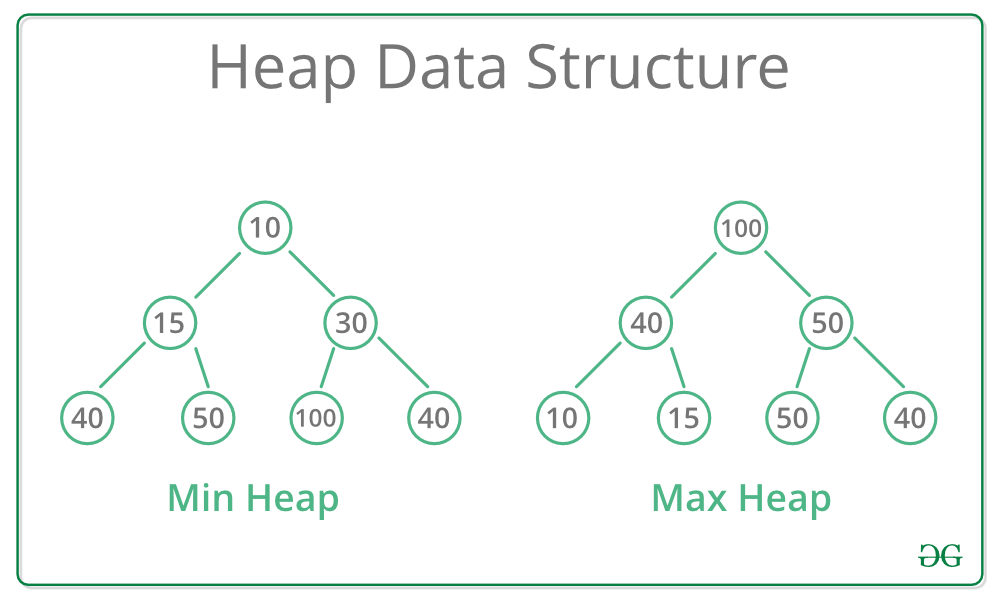

### Heap Sort Process (Max-Heap example)
1. Consctruct heap (from bottom to top)
2. The top/root of the tree is the max element
3. Swap the num in root with the last num in the tree
4. Adjust the tree
5. The root is now the second smallest element in the tree
6. repeat step 3 until the tree becomes empty

- Time Complexity: O(nlog(n))

![image-2.png](https://miro.medium.com/max/798/0*hVi2iYTIVkrm9ODv.gif)

In [11]:
def sift(li,low,high):
    '''
    param li: List
    param low: Root of the heap
    param high: The last element in the heap
    return:
    '''
    
    i = low #Pointer to the root
    j = 2*i + 1 #Pointer to the left child of the root
    tmp = li[low] #Save the heap head
    while j <= high: # j is pointing to a num
        if j+1 <= high and li[j+1] > li[j]: #If the left child exists and less than its parent
            j = j + 1 #j is the pointer to the right child
        if li[j] > tmp:
            li[i] = li[j]
            i = j
            j = 2*i + 1
        else:
            break
    li[i] = tmp

def heap_sort(li):
    n = len(li)
    for i in range((n-2)//2, -1 ,-1): # From the parent of the last child node to 0, which decrement of 1
        # i is the pointer of adjusted part's root
        sift(li,i,n-1)
    # Finishing step 1 and 4 
    # Constructing the heap
    
    for i in range(n-1,-1,-1):
        # i is the pointer to the last element in the current heap
        li[0],li[i] = li[i], li[0]
        sift(li,0,i-1) #i-1 is the new high
    